In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
df = pd.read_pickle('../data/processed/01_cleaning_df.pkl')
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
#spliting data
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [49]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()

x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)

In [50]:
# LogisticRegression Model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

logmodel.fit(x_train,y_train)
pred = logmodel.predict(x_test)

In [51]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion matrix


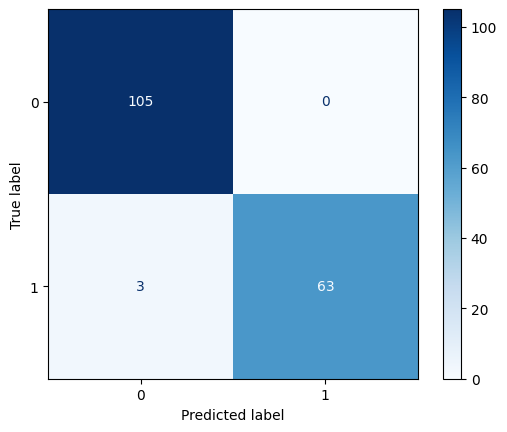

Normalized confusion matrix


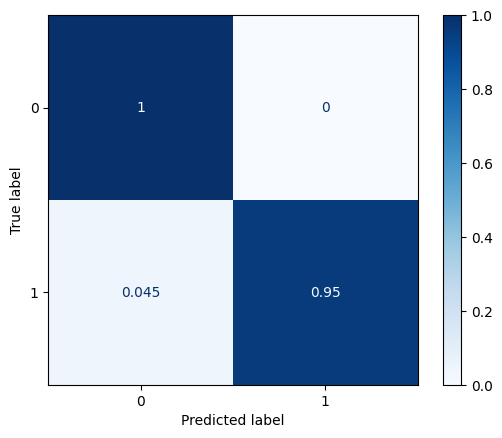

In [52]:
#Confusion Matrix without Normalization
print('confusion matrix')
ConfusionMatrixDisplay.from_estimator(logmodel,x_test,y_test, cmap='Blues')
plt.show()

#Normalized Confusion Matrix
print('Normalized confusion matrix')
ConfusionMatrixDisplay.from_estimator(logmodel,x_test,y_test, normalize='true',cmap='Blues')
plt.show()

In [53]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[105   0]
 [  3  63]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       105
           1       1.00      0.95      0.98        66

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

0.9824561403508771


In [54]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, random_state=0)

RF.fit(x_train,y_train)
pred = RF.predict(x_test)

confusion matrix


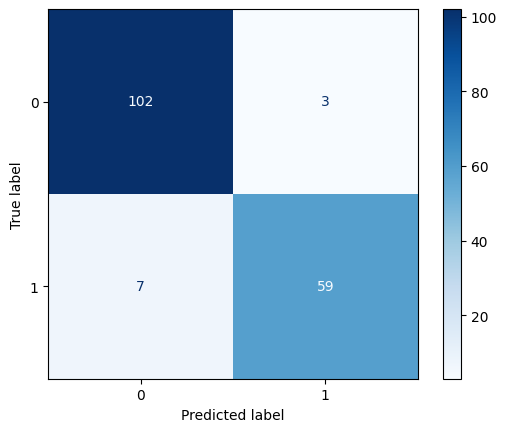

Normalized confusion matrix


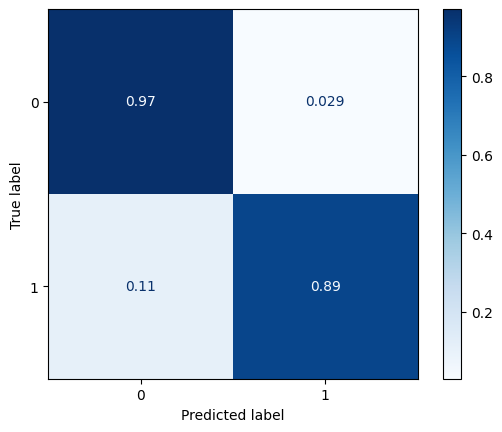

In [55]:
#Confusion Matrix without Normalization
print('confusion matrix')
ConfusionMatrixDisplay.from_estimator(RF,x_test,y_test, cmap='Blues')
plt.show()

#Normalized Confusion Matrix
print('Normalized confusion matrix')
ConfusionMatrixDisplay.from_estimator(RF,x_test,y_test, normalize='true',cmap='Blues')
plt.show()

In [56]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[102   3]
 [  7  59]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       105
           1       0.95      0.89      0.92        66

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

0.9415204678362573
